# 기계학습 (60점)

### 전국 병의원 데이터
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_m1.csv    
출처 : https://www.data.go.kr/data/15083033/fileData.do    
        
전국의 병의원 (치과의원,의원,한의원)의 정보이다.           
        

In [60]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_m1.csv')
df.sample(5)

,사업장명,업태구분명,진료과목내용명,도로명전체주소,인허가일자,상세영업상태명,폐업일자
83511,제영태치과의원,치과의원,"구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과,...","서울특별시 마포구 새창로8길 72, 상가동 206호 (도화동, 현대홈타운)",1998-12-02,폐업,2022-11-03
9750,필라인의원,의원,성형외과,"대구광역시 중구 동성로5길 31, 5층 (삼덕동1가)",2014-11-17,영업중,NaN
20786,인천평화의료복지사회적협동조합평화치과의원,치과의원,"구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과,...","인천광역시 부평구 수변로 8, 203호 (부개동, 파워프라자)",2010-12-10,영업중,NaN
10760,다정한의원,한의원,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...","대구광역시 달서구 한실로 97, 2층 (도원동)",2001-09-07,영업중,NaN
77482,고래신경외과의원,의원,"내과, 정형외과, 신경외과, 마취통증의학과, 안과, 재활의학과",부산광역시 중구 자갈치로 45 (남포동5가),2011-10-13,폐업,2015-12-10


In [61]:
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

### 기계학습1
시각화를 포함한 데이터 EDA

In [62]:
df[(df.상세영업상태명 =='폐업') & (df.폐업일자.isnull())]

,사업장명,업태구분명,진료과목내용명,도로명전체주소,인허가일자,상세영업상태명,폐업일자
67623,협성한의원,한의원,"한방내과, 한방부인과, 한방소아과, 한방안·이비인후·피부과, 한방신경정신과, 한방재...",서울특별시 영등포구 선유로 104 (양평동1가),1993-02-02,폐업,NaN


In [63]:
df.isnull().sum()

사업장명           0
업태구분명          0
진료과목내용명        0
도로명전체주소        0
인허가일자          0
상세영업상태명        0
폐업일자       66056
dtype: int64

In [64]:
df['city'] = df['도로명전체주소'].str.split(' ').str[0]

In [65]:
r = pd.crosstab(df['업태구분명'],df['city']).T

In [66]:
row_sums = r.sum(axis=1)

df_ratio = r.div(row_sums, axis=0)

In [67]:
import seaborn as sns

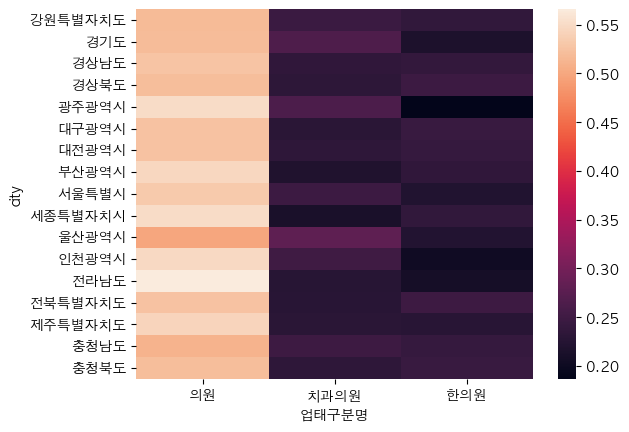

In [68]:
sns.heatmap(df_ratio)
plt.show()

### 기계학습2
진료과목내용명의 연관분석을 진행하려한다.     
업태를 의원,한의원,치과의원 각각 나누어 데이터 전처리 및 트랜잭션 변환을 진행하라

In [69]:
dfs = df.copy()

In [70]:
dfs['ID'] = ['ID'+'_'+str(y) for y in range(len(df))]

In [74]:
df1 = dfs[dfs.업태구분명 =='치과의원'].reset_index(drop=True)

In [75]:
df1['sp'] = df1['진료과목내용명'].map(lambda x : [y.strip() for y in x.split(',')])

In [88]:
ex = df1[['ID','sp']].explode('sp')

In [84]:
ex['v'] =1

In [87]:
ex.pivot_table(index='ID',columns ='sp',values='v')

sp,구강내과,구강병리과,구강악안면방사선과,구강악안면외과,내과,소아치과,영상치의학과,예방의학과,예방치과,치과,치과교정과,치과보존과,치과보철과,치주과,통합치의학과,한방부인과
ID,,,,,,,,,,,,,,,,
ID_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ID_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ID_10000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_10011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
ID_10013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_998,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN
ID_9982,1.0,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN
ID_9990,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN


In [95]:
pt = ex.pivot_table(index='ID',columns ='sp',aggfunc=len).fillna(0).astype('int')

In [175]:
dfs[dfs.ID =='ID_16089'].진료과목내용명.values[0]

'구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과, 구강악안면방사선과, 구강병리과, 예방치과, 치과, 치과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과, 영상치의학과, 구강병리과, 예방치과'

### 기계학습3
업태별로 연관 규칙 생성 및 평가 지표 계산을 진행하라    

In [176]:
from mlxtend.frequent_patterns import apriori, association_rules

In [177]:
frequent_itemsets = apriori(pt ==1, min_support=0.3, use_colnames=True,)

In [178]:
frequent_itemsets.sort_values('support')

,support,itemsets
247,0.300259,"(예방치과, 치주과, 치과보존과, 구강악안면외과, 소아치과, 치과교정과, 치과보철과)"
237,0.300648,"(예방치과, 치과보존과, 구강악안면외과, 소아치과, 치과교정과, 치과보철과)"
238,0.301080,"(예방치과, 치주과, 치과보존과, 구강악안면외과, 소아치과, 치과교정과)"
201,0.301642,"(예방치과, 치과보존과, 구강악안면외과, 소아치과, 치과교정과)"
164,0.302809,"(치과보철과, 치주과, 치과보존과, 영상치의학과)"
...,...,...
40,0.427398,"(치과보철과, 치주과)"
7,0.427528,(치과보존과)
9,0.437295,(치주과)
8,0.444987,(치과보철과)


In [132]:
# 연관 규칙 생성
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(구강악안면외과),(구강내과),0.411452,0.392567,0.362143,0.880160,2.242062,0.200621,5.068685
1,(구강내과),(구강악안면외과),0.392567,0.411452,0.362143,0.922501,2.242062,0.200621,7.594275
2,(구강내과),(소아치과),0.392567,0.421348,0.372558,0.949031,2.252368,0.207151,11.353071
3,(소아치과),(구강내과),0.421348,0.392567,0.372558,0.884205,2.252368,0.207151,5.245768
4,(예방치과),(구강내과),0.397061,0.392567,0.355791,0.896060,2.282566,0.199918,5.844078
...,...,...,...,...,...,...,...,...,...
4782,(예방치과),"(치주과, 치과보존과, 구강악안면외과, 소아치과, 치과교정과, 치과보철과)",0.397061,0.320484,0.300259,0.756204,2.359568,0.173007,2.787229
4783,(치과보존과),"(치주과, 예방치과, 구강악안면외과, 소아치과, 치과교정과, 치과보철과)",0.427528,0.303976,0.300259,0.702315,2.310430,0.170301,2.338121
4784,(구강악안면외과),"(치주과, 예방치과, 치과보존과, 소아치과, 치과교정과, 치과보철과)",0.411452,0.312230,0.300259,0.729755,2.337237,0.171792,2.544990
4785,(소아치과),"(치주과, 예방치과, 치과보존과, 구강악안면외과, 치과교정과, 치과보철과)",0.421348,0.304278,0.300259,0.712615,2.341986,0.172052,2.420873


In [191]:
rules['antecedents'] = rules['antecedents'].map(lambda x : '_'.join(sorted(list(x))))
rules['consequents'] = rules['consequents'].map(lambda x : '_'.join(sorted(list(x))))

In [196]:
rules[rules.antecedents =='치과보철과'].sort_values('confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4287,치과보철과,소아치과_예방치과_치과교정과_치과보존과_치주과,0.444987,0.313483,0.312230,0.701661,2.238272,0.172734,2.301128
3492,치과보철과,구강내과_구강악안면외과_치과교정과_치과보존과_치주과,0.444987,0.313267,0.312619,0.702535,2.242606,0.173219,2.308615
1774,치과보철과,구강내과_구강악안면외과_치과교정과_치과보존과,0.444987,0.313613,0.312878,0.703117,2.241992,0.173325,2.311982
2786,치과보철과,소아치과_예방치과_치과교정과_치과보존과,0.444987,0.315039,0.313008,0.703409,2.232768,0.172820,2.309445
1834,치과보철과,구강내과_구강악안면외과_치과교정과_치주과,0.444987,0.314780,0.313915,0.705448,2.241086,0.173842,2.326315
...,...,...,...,...,...,...,...,...,...
333,치과보철과,소아치과_치주과,0.444987,0.406007,0.401210,0.901622,2.220706,0.220542,6.037855
32,치과보철과,소아치과,0.444987,0.421348,0.407865,0.916578,2.175344,0.220371,6.936410
407,치과보철과,치과보존과_치주과,0.444987,0.417545,0.412446,0.926872,2.219811,0.226644,7.964854
54,치과보철과,치과보존과,0.444987,0.427528,0.418539,0.940565,2.200008,0.228295,9.631933


### 기계학습4
연관 규칙 해석 및 업태별 개업시 전략을 제안하라    

각각 인기과들 위주로 , 의사들의 상황에 따라

### 서울의 미세먼지 데이터
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_m2.csv    
출처 : https://www.data.go.kr/data/15089266/fileData.do
        
2020년~ 2022년도의 서울 각 지역구의 시간별    
미세먼지(pm10)와 초미세먼지(pm25)데이터이다.         
하루동안의 미세먼지(pm10)와 지역구,시간 정보를 바탕으로 다음날 00:00시의 해당 지역구의 초미세먼지(pm25)를      
예측하는 회귀 모델을 만들려고 한다.   

In [197]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_m2.csv')

In [198]:
df

,일시,구분,pm10,pm25,date,hour
0,2022-12-31 23:00:00,강남구,57.0,44.0,2022-12-31,23
1,2022-12-31 23:00:00,강동구,68.0,55.0,2022-12-31,23
2,2022-12-31 23:00:00,강북구,59.0,42.0,2022-12-31,23
3,2022-12-31 23:00:00,강서구,62.0,40.0,2022-12-31,23
4,2022-12-31 23:00:00,관악구,57.0,38.0,2022-12-31,23
...,...,...,...,...,...,...
657593,2020-01-01 00:00:00,용산구,12.0,13.0,2020-01-01,0
657594,2020-01-01 00:00:00,은평구,18.0,12.0,2020-01-01,0
657595,2020-01-01 00:00:00,종로구,20.0,15.0,2020-01-01,0
657596,2020-01-01 00:00:00,중구,22.0,18.0,2020-01-01,0


### 기계학습5
시각화를 포함한 EDA

In [203]:
df['일시'] = pd.to_datetime(df['일시'])
df['month'] = df['일시'].dt.month

In [204]:
df.isnull().sum()

일시           0
구분           0
pm10     14508
pm25     11558
date         0
hour         0
month        0
dtype: int64

In [209]:
g = df.groupby(['구분','month'])[['pm10','pm25']].mean()

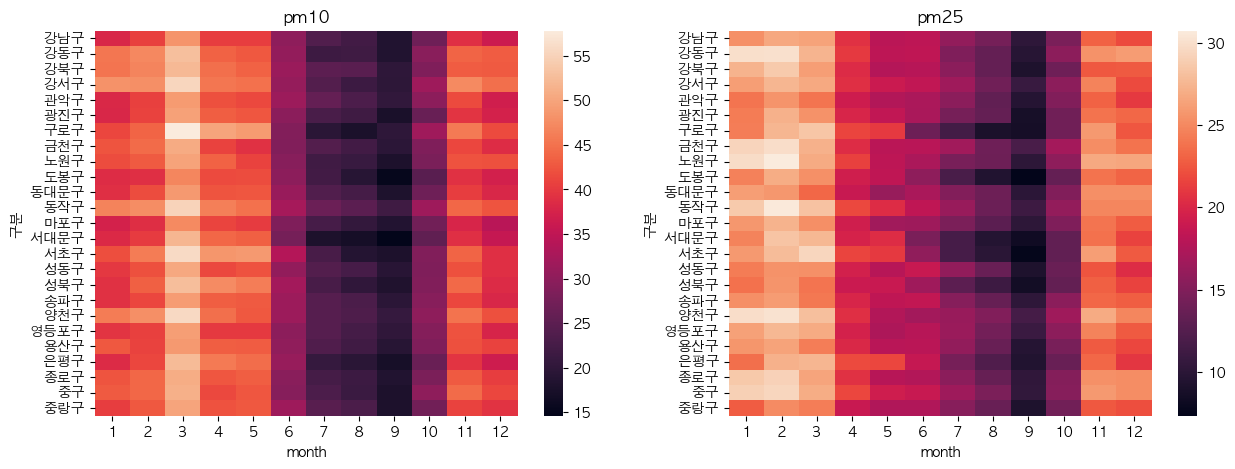

In [223]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sns.heatmap(g['pm10'].unstack(),ax=ax[0])
sns.heatmap(g['pm25'].unstack(),ax=ax[1])
ax[0].set_title('pm10')
ax[1].set_title('pm25')

plt.show()

### 기계학습6
모델링을 위한 데이터 전처리 및 결측치 처리를 시행하라    
독립변수는 a일자의 지역구, 각 시간대별 pm10값이며    
종속변수는 a+1일자의 00:00시의 해당 지역구의 pm25 값이다      
아래는 예시이다.    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_m1_img.png)

In [229]:
df1 = df.pivot_table(index=['date','구분'],columns =['hour'],values='pm10').reset_index()

In [253]:
df1.columns  = ['일자','구분'] +[str(x)+'시' for x in  range(24)]
df1['일자'] = pd.to_datetime(df1['일자'])

In [254]:
df2 = df[df.hour ==0].reset_index(drop=True)
df2['date'] = pd.to_datetime(df2['date']) + pd.Timedelta(days=1)
df2 = df2.rename(columns ={'date':'일자'})

In [258]:
m= pd.merge(df1,df2[['일자','구분','pm25']],how='outer')

In [263]:
mm = m[m.pm25.notnull()].reset_index(drop=True)

In [277]:
mm.isnull().sum(axis=1).value_counts().sort_index()

0     22623
1      1562
2      1298
3       704
4       254
5       128
6        92
7        61
8        37
9        39
10       45
11       33
12       22
13       18
14       15
15       11
16       16
17       18
18       17
19       11
20        3
21        2
22        3
23        4
24       53
Name: count, dtype: int64

In [310]:
mf = mm[mm.isnull().sum(axis=1) <=2].reset_index(drop=True)

In [312]:
mf.iloc[:,2:] =mf.iloc[:,2:].interpolate(axis=1).fillna(method='bfill',axis=1).values.round(1)

In [322]:
mf['month'] = mf['일자'].dt.month
mf['weekday'] = mf['일자'].dt.weekday

### 기계학습7
3가지 회귀 분석 모델을 선정하고 선정이유를 설명하라. 각 모델을 kfold 방식을 통해 학습하고 적절한 평가지표를 통해 모델을 평가하라.   

In [324]:
mf.head()

,일자,구분,0시,1시,2시,3시,4시,5시,6시,7시,...,17시,18시,19시,20시,21시,22시,23시,pm25,month,weekday
0,2020-01-02,강남구,42.0,43.0,41.0,40.0,40.0,42.0,40.0,43.0,...,70.0,64.0,66.0,65.0,67.0,66.0,68.0,13.0,1,3
1,2020-01-02,강동구,49.0,49.0,49.0,50.0,47.0,48.0,46.0,51.0,...,77.0,80.0,82.0,79.0,84.0,82.0,83.0,18.0,1,3
2,2020-01-02,강북구,49.0,48.0,48.0,49.0,49.0,47.0,49.0,52.0,...,73.0,70.0,72.0,73.0,74.0,69.0,67.0,13.0,1,3
3,2020-01-02,강서구,49.0,53.0,51.0,55.0,49.0,54.0,51.0,52.0,...,77.0,75.0,84.0,85.0,93.0,89.0,95.0,13.0,1,3
4,2020-01-02,관악구,47.0,49.0,48.0,47.0,43.0,43.0,43.0,44.0,...,77.7,75.3,73.0,68.0,68.0,69.0,68.0,16.0,1,3


In [337]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

t = mf.sample(5000,random_state=1)
x = t.drop(columns =['일자','pm25'])
X = pd.get_dummies(x).values
y = t['pm25']

rf = RandomForestRegressor(random_state=1)
dct = DecisionTreeRegressor(random_state=1)
ad = AdaBoostRegressor(random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    score = mean_squared_error(y_test, predictions)
    scores.append(score)

print("평균 정확도: {:.2f}".format(np.mean(scores)))





평균 정확도: 187.58
CPU times: user 23.6 s, sys: 121 ms, total: 23.8 s
Wall time: 23.9 s


In [362]:
%%time

rf = RandomForestRegressor(random_state=1)
dct = DecisionTreeRegressor(random_state=1)
ad = AdaBoostRegressor(random_state=1)


rf_scores = cross_val_score(rf, X, y, cv=5,scoring='neg_mean_squared_error')
dct_scores = cross_val_score(dct, X, y, cv=5,scoring='neg_mean_squared_error')
ad_scores = cross_val_score(ad, X, y, cv=5,scoring='neg_mean_squared_error')

CPU times: user 24.3 s, sys: 124 ms, total: 24.5 s
Wall time: 24.5 s


In [363]:
result = pd.DataFrame({'model':['rf','det','lr'],'score':[np.mean(rf_scores),np.mean(dct_scores),np.mean(lr_scores)]})
result

,model,score
0,rf,-142.455402
1,det,-258.823600
2,lr,-276.673850


### 기계학습8
7번에서 가장 높은 스코어를 가진 모델 하나를 선정하여 최적화 과정을 하려한다. grid search를 통해 모델을 학습하여 성능을 비교하라

In [399]:

t = mf.sample(500,random_state=1)
x = t.drop(columns =['일자','pm25'])
X = pd.get_dummies(x).values
y = t['pm25']

In [401]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=1)

param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 4, 6],  
    'min_samples_leaf': [1, 2, 4],  
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_search.fit(X, y,)

# 결과 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 평균 정확도: {:.2f}".format(grid_search.best_score_))

최적 하이퍼파라미터: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
최고 평균 정확도: -206.01


### 기계학습9
학습한 모델을 통해 실시간 안내시스템을 구축하려 한다. 고려해야할 사항을 논의 하라

- 결측치 발생시
- 모델 운영시 모델 용량
- 모델 업데이트 주기
- 모델 최적화를 위한 추가적인 데이터 수집

# 통계 (40점)

### 통계1
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_s1.csv    
출처 : https://www.data.go.kr/data/15083033/fileData.do    
    
지역별 헬스장의 인허가 일자 및 폐업일자에 관한 데이터이다(2025-02-28일에 조사된 데이터라고 가정한다)    
수도권(서울,경기도)과 지방(그 외)의 인허가 후 365일 이내 폐업 여부가 연관이 있는지 확인하려한다.    
(1) 가설설정     
(2) 통계 검정

In [369]:
import pandas as pd

In [370]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_s1.csv')
df.head()

,인허가일자,폐업일자,상세영업상태명,소재지전체주소,사업장명
0,2014-09-24,NaN,영업중,대구광역시 달성군 다사읍 죽곡리 808-1번지 2~3층,슬림 휘트니스 클럽
1,2016-05-02,NaN,영업중,대구광역시 달성군 화원읍 구라리 1737-14번지 4층,다짐휘트니스
2,2016-05-09,NaN,영업중,대구광역시 달성군 옥포읍 교항리 2902번지,디젤 피트니스
3,2016-12-13,NaN,영업중,대구광역시 달성군 유가읍 봉리 606 하이젠스타 9층,뷰스 짐
4,2017-01-04,NaN,영업중,대구광역시 달성군 다사읍 세천리 1580-9번지 3층,다짐휘트니스


In [371]:
wff = df.copy()
wff['ct'] = wff['소재지전체주소'].str.split(' ').str[0]
wff['기간'] = wff['폐업일자'].fillna('2025-02-28')

wff['del_day'] = (pd.to_datetime(wff['기간']) -pd.to_datetime(wff['인허가일자'] )).dt.days

wff['폐업여부'] =None
wff.loc[(wff.상세영업상태명 =='폐업') & (wff.del_day <=365) , '폐업여부'] ='yes'
wff['폐업여부'] =wff['폐업여부'].fillna('no')
wff['ctt'] = wff['ct'].map(lambda x : '수도권' if x in ['서울특별시','경기도'] else '지방')

from scipy.stats import chi2_contingency

re = chi2_contingency(pd.crosstab(wff['ctt'],wff['폐업여부']))

print(re[1])
pd.crosstab(wff['ctt'],wff['폐업여부'])



0.03265931875988026


폐업여부,no,yes
ctt,,
수도권,10550,232
지방,10506,186


### 통계2
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_s2.csv    
출처 : https://www.data.go.kr/data/15083033/fileData.do    
    
여러 치킨 브랜드의 데이터이다(치킨브랜드는 사업장명에 반드시 대표 브랜드명이 들어가야한다)           
2017~ 2022년도에 인허가가 발생한 굽네치킨,교촌치킨,네네치킨,자담치킨 영업장의 시설총규모간의 차이가 브랜드별로 존재하는지 확인하려 한다.         
(1) ANOVA를 사용 하기 위한 사전 조건들을 확인 하라         
(2) 적당한 통계 검정을 실시 하고 필요하다면 사후 분석까지 진행하라    

In [420]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_s2.csv')
df.head()

,인허가일자,사업장명,업태구분명,시설총규모,업체ID
0,2023-11-24,자담치킨,한식,186.00,ID_0
1,2023-09-27,네네치킨&봉구스밥버거 안동과학대점,호프/통닭,25.00,ID_1
2,2023-10-11,교촌치킨 봉천3호점,기타,72.00,ID_2
3,2019-01-09,맘스터치,분식,38.78,ID_3
4,2022-05-10,노랑통닭,호프/통닭,26.10,ID_4


In [421]:
def filter_name(x):
    if '굽네치킨' in x :
        return '굽네치킨'
    
    elif '교촌치킨' in x:
        return '교촌치킨'
    
    elif '네네치킨' in x:
        return '네네치킨'
    
    elif '자담치킨' in x:
        return '자담치킨'
    
    else:
        return None
    
    
df['brand'] = df['사업장명'].apply(filter_name)
df = df[df.brand.notnull()].reset_index(drop=True)
df = df[df.인허가일자.str.split('-').str[0].isin(['2017','2018','2019','2020','2021','2022'])].reset_index(drop=True)

In [422]:
df.shap

,인허가일자,사업장명,업태구분명,시설총규모,업체ID,brand
0,2021-01-22,자담치킨 초지점,호프/통닭,38.40,ID_8,자담치킨
1,2021-02-01,자담치킨 각산점,기타,38.11,ID_9,자담치킨
2,2021-01-18,자담치킨 관저점,호프/통닭,52.29,ID_11,자담치킨
3,2021-01-19,자담치킨안양호계점,호프/통닭,26.04,ID_12,자담치킨
4,2021-01-25,자담치킨 함안점,호프/통닭,44.91,ID_13,자담치킨
...,...,...,...,...,...,...
1416,2020-02-11,굽네치킨진해장천점,호프/통닭,19.80,ID_11252,굽네치킨
1417,2020-06-04,교촌치킨남문점,호프/통닭,98.19,ID_11258,교촌치킨
1418,2020-08-11,네네치킨신항만점,호프/통닭,39.60,ID_11262,네네치킨
1419,2020-11-19,자담치킨(창원내서점),호프/통닭,39.60,ID_11267,자담치킨


In [105]:
import numpy as np
from scipy.stats import f_oneway

# 세 개의 그룹에 대한 샘플 데이터 생성
group1 = df[df.brand =='굽네치킨']['시설총규모']
group2 = df[df.brand =='교촌치킨']['시설총규모']
group3 = df[df.brand =='네네치킨']['시설총규모']
group4 = df[df.brand =='자담치킨']['시설총규모']

# 일원배치 ANOVA 수행
f_statistic, p_value = f_oneway(group1, group2, group3,group4)

print("F-통계량:", f_statistic)
print("P-값:", p_value)


F-통계량: 190.68174056259787
P-값: 7.308076862295512e-104


In [106]:
from scipy.stats import shapiro

print("Group 1:", shapiro(group1))
print("Group 2:", shapiro(group2))
print("Group 3:", shapiro(group3))
print("Group 4:", shapiro(group4))

Group 1: ShapiroResult(statistic=0.873664915561676, pvalue=2.095890066114805e-15)
Group 2: ShapiroResult(statistic=0.8212234973907471, pvalue=3.5751230750682024e-21)
Group 3: ShapiroResult(statistic=0.772233247756958, pvalue=1.7722625667362935e-12)
Group 4: ShapiroResult(statistic=0.8250226974487305, pvalue=2.0305299421911474e-24)


In [ ]:
from scipy.stats import levene

# Levene 등분산성 검정
stat, p = levene(group1, group2, group3,group4)

In [107]:
from scipy.stats import levene

# Levene 등분산성 검정
stat, p = levene(group1, group2, group3,group4)
print("Levene 검정 p-value =", p)


Levene 검정 p-value = 1.7405615101408585e-11


In [108]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

In [109]:
# 사후 분석을 위한 데이터 준비
data = np.concatenate([group1, group2, group3,group4])
groups = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3)+ ['group4'] * len(group4)
df = pd.DataFrame({'value': data, 'group': groups})

# Tukey HSD 사후 분석
tukey = pairwise_tukeyhsd(endog=df['value'], groups=df['group'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
group1 group2  36.3291   -0.0  30.1156  42.5425   True
group1 group3 -16.0183    0.0 -24.8895  -7.1472   True
group1 group4 -10.0371 0.0001 -15.8813  -4.1929   True
group2 group3 -52.3474   -0.0 -60.9126 -43.7822   True
group2 group4 -46.3661   -0.0 -51.7346 -40.9977   True
group3 group4   5.9812  0.249    -2.32  14.2825  False
------------------------------------------------------


정규성 등분산 가정을 만족하지 않늗나

In [423]:
from scipy.stats import kruskal
kruskal(group1, group2, group3,group4)

KruskalResult(statistic=496.794760111248, pvalue=2.3620476585292532e-107)

In [424]:
import scikit_posthocs as sp
data = np.array([group1, group2, group3,group3])
groups = ['group1', 'group2', 'group3','group4']

df = pd.DataFrame(data=np.concatenate(data), columns=["value"])
df["group"] = np.repeat(groups, [len(a) for a in data])

# Dunn의 사후 검정 수행
posthoc = sp.posthoc_dunn(df, val_col='value', group_col='group')

posthoc

<ipython-input-424-dd04061ce3f6>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([group1, group2, group3,group3])


,group1,group2,group3,group4
group1,1.000000e+00,1.906711e-37,1.708725e-08,1.708725e-08
group2,1.906711e-37,1.000000e+00,1.241577e-51,1.241577e-51
group3,1.708725e-08,1.241577e-51,1.000000e+00,1.000000e+00
group4,1.708725e-08,1.241577e-51,1.000000e+00,1.000000e+00


In [427]:
df.group.value_counts()

group
group2    416
group1    315
group3    122
group4    122
Name: count, dtype: int64

### 통계3
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_s3.csv    
출처 : https://vincentarelbundock.github.io/Rdatasets/datasets.html
    
각 행은 여러 요소들(A,C,E,N,O)의 정량적인 값을 의미한다

(1) 요인성분석을 통해 요인분석이 가능한지 확인하라     
(2) 요인분석을 통해 적정 요인수를 확인하고 탐색적 요인분석을 실시하라

In [378]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/002_s3.csv')
df

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N2,N3,N4,N5,O1,O2,O3,O4,O5,ID
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,ID_0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,ID_1
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,ID_2
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,ID_3
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,ID_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,4.0,...,6.0,5.0,5.0,6.0,6.0,1,4.0,5.0,2.0,ID_2431
2432,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2.0,3.0,5.0,...,5.0,3.0,5.0,2.0,6.0,1,5.0,6.0,2.0,ID_2432
2433,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,...,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0,ID_2433
2434,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,...,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0,ID_2434


https://ysyblog.tistory.com/124 참고

In [388]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# calculate_bartlett_sphericity
# 귀무가설 : 상관행렬이 단위행렬 (변수간 상관성 없다)
# 대립가설 : 상관행렬이 단위행렬이 아니다 (변수간 상관성 있다) > 요인분석 가능


# calculate_kmo
# KMO는 관측 된 모든 변수 간의 분산 비율을 추정 , p값 없음 , 0.7이상 적정

kmo_all,kmo_model=calculate_kmo(dff)
kmo_model
# 0.848539722194922

In [383]:
dff = df.drop(columns = ['ID'])

In [389]:
fa = FactorAnalyzer(n_factors=25,rotation=None)
fa.fit(dff)
#Eigen값 체크 
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

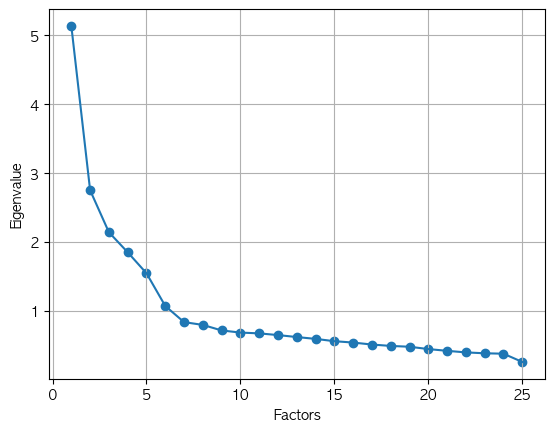

In [392]:
plt.scatter(range(1,dff.shape[1]+1),ev)
plt.plot(range(1,dff.shape[1]+1),ev)
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


eigenvalue > 1이상

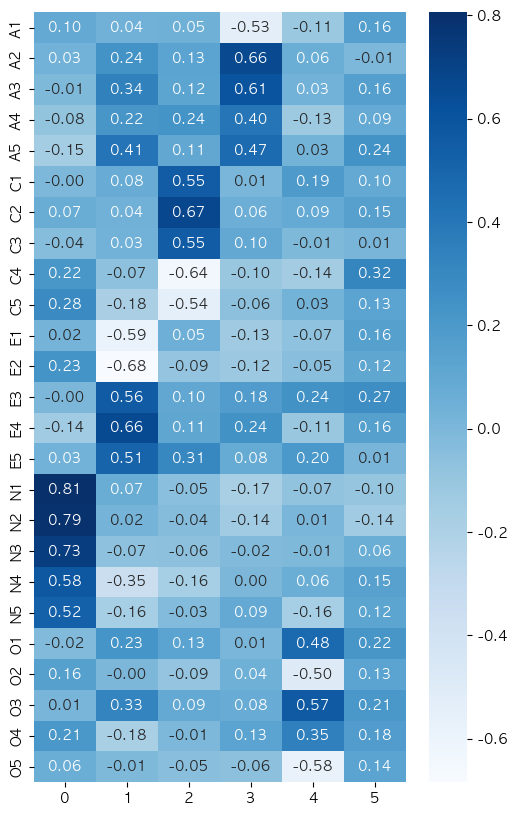

In [398]:
fa = FactorAnalyzer(n_factors=6, rotation="varimax") #ml : 최대우도 방법
fa.fit(dff)
efa_result= pd.DataFrame(fa.loadings_, index=dff.columns)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [413]:
faa = fa.fit_transform(dff)

### 통계4
두명의 운동선수가 2번의 경기동안 득점한 결과이다.      
(1) 두 선수의 실력이 동일 하다 말할 수 있는지 검정하라   
(2) 오즈비를 구하여라    

<table>
<tr>
    <th></th>
    <td>1경기</td>
    <td>2경기</td> 
</tr>

<tr>
    <td>선수1</td> 
    <td>10</td> 
    <td>2</td>
</tr>

<tr>
    <td>선수2</td> 
    <td>3</td> 
    <td>6</td>   
</tr>

</table>  

In [415]:
from scipy.stats import fisher_exact

data = [[10,2],[3,6]]

oddsratio, p_value = fisher_exact(data)

In [418]:
oddsratio #  (ad / bc)

10.0

In [417]:
p_value

0.03184431667403806